In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Amazon Sales Data Project

## Exploring Data

### 1.Load the data set as excel file

In [9]:
sales_data = pd.read_excel("sales_data.xlsx")

### 2.Convert it into Data Frame and get summary about the data and its types with statistics describtion

In [10]:
sales_data = pd.DataFrame(sales_data)
print(sales_data.info())
print(sales_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

### 3.Get column names and investigate the first few rows

In [11]:
print(sales_data.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')


In [12]:
print(sales_data.head(5))

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

  Category  ... Qty currency  Amount    ship-city   ship-state  \
0      Set  ...   0      INR  647.62  

## Cleaning Data

### 1. Checking missing Values

In [13]:
print(sales_data.isnull().sum())

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               40
ship-postal-code         40
ship-country             40
promotion-ids         49160
B2B                       7
fulfilled-by          89699
dtype: int64


### Heatmap for missing values

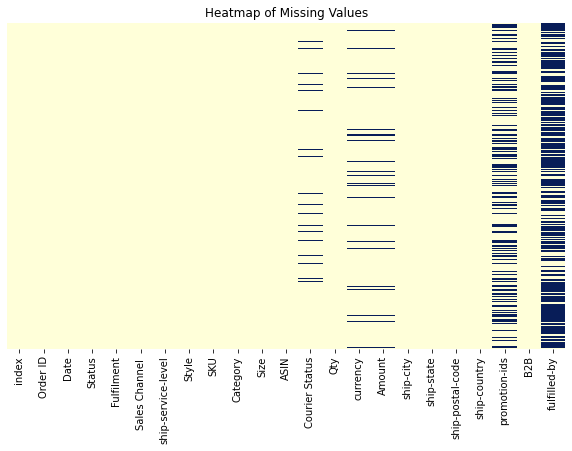

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(sales_data.isnull(), cbar=False, cmap='YlGnBu', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

#### we found that a lot of dataset has null values. we can't drop the rows of missing values. we will drop rows only that will have null value in amount as it is very important feature.

In [14]:
sales_data_cleaned = sales_data.dropna(subset = ['Amount'])

In [15]:
print(sales_data_cleaned.info())
print(sales_data_cleaned.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121180 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               121180 non-null  int64  
 1   Order ID            121180 non-null  object 
 2   Date                121180 non-null  object 
 3   Status              121180 non-null  object 
 4   Fulfilment          121180 non-null  object 
 5   Sales Channel       121180 non-null  object 
 6   ship-service-level  121180 non-null  object 
 7   Style               121180 non-null  object 
 8   SKU                 121180 non-null  object 
 9   Category            121180 non-null  object 
 10  Size                121180 non-null  object 
 11  ASIN                121180 non-null  object 
 12  Courier Status      116044 non-null  object 
 13  Qty                 121180 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

### 2. Checking duplicated Values

In [16]:
print(sales_data.duplicated())
print(sales_data.duplicated().sum())

0         False
1         False
2         False
3         False
4         False
          ...  
128970    False
128971    False
128972    False
128973    False
128974    False
Length: 128975, dtype: bool
0


#### we found no dupliacted values 

## Questions to be answered:

### 1. How many sales have they made with amounts more than 1000
### 2. How many sales have they made that belong to category "Tops" and have a quantity of 3
### 3. What is the total sales based on each category
### 4. What is the average amount by category and status
### 5. What is the total sales based on each fulfilmet and shipment type

### The sales made with amounts more than 1000

In [17]:
Sales_more_Than_1000 = sales_data_cleaned[sales_data_cleaned['Amount'] > 1000]
print(Sales_more_Than_1000.count().sort_values(ascending = False))

index                 13332
Category              13332
B2B                   13332
Amount                13332
currency              13332
Qty                   13332
Order ID              13332
Size                  13332
ASIN                  13332
SKU                   13332
Style                 13332
ship-service-level    13332
Sales Channel         13332
Fulfilment            13332
Status                13332
Date                  13332
ship-city             13330
ship-state            13330
ship-postal-code      13330
ship-country          13330
Courier Status        12948
promotion-ids          9303
fulfilled-by           3753
dtype: int64


#### we found that the total orders more than 1000 is 13332 order. 9303 of them have promotion-ids 

### The sales have they made that belong to category "Top" and have a quantity of 3

In [18]:
Sales_Tops_and_Qty_3 = sales_data_cleaned[(sales_data_cleaned['Category']  == "Top") & (sales_data_cleaned['Qty'] == 3)]
print(Sales_Tops_and_Qty_3.count())

index                 3
Order ID              3
Date                  3
Status                3
Fulfilment            3
Sales Channel         3
ship-service-level    3
Style                 3
SKU                   3
Category              3
Size                  3
ASIN                  3
Courier Status        3
Qty                   3
currency              3
Amount                3
ship-city             3
ship-state            3
ship-postal-code      3
ship-country          3
promotion-ids         3
B2B                   3
fulfilled-by          2
dtype: int64


#### we found that the total orders are 3.

### The total sales based on each category sorted from descending to ascending based on total amount value

In [27]:
category_total = sales_data_cleaned.groupby('Category', as_index = False)['Amount'].sum()
print(category_total.sort_values('Amount', ascending = False))

  Category       Amount
4      Set  39204124.03
0   Blouse  21757954.88
2    Dress  12131224.11
5      Top   5347792.30
1   Bottom    150667.98
3    Scarf       915.00


### Pie chart for sales distribution by category

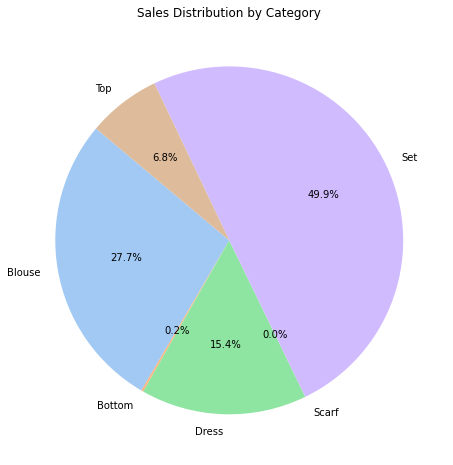

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(category_total['Amount'], labels=category_total['Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Category')
plt.show()

### Bar plot for total sales by category

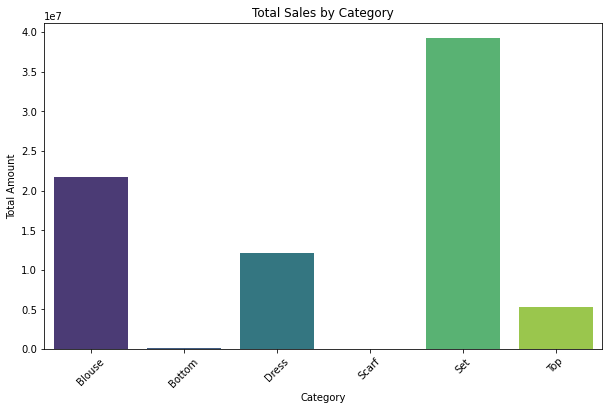

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Amount', data=category_total, palette='viridis')
plt.title('Total Sales by Category')
plt.ylabel('Total Amount')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

### Box plot for distribution of sales amount by category

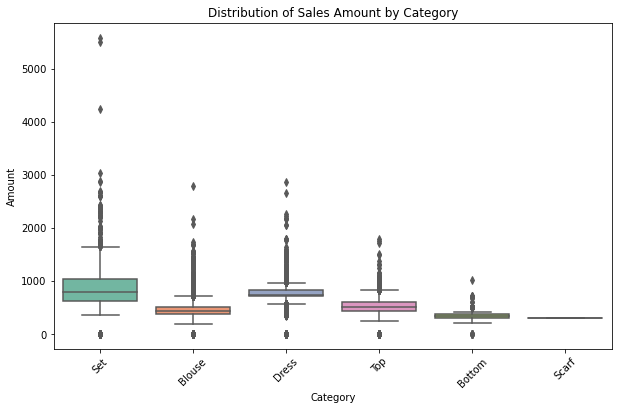

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Amount', data=sales_data_cleaned, palette='Set2')
plt.title('Distribution of Sales Amount by Category')
plt.ylabel('Amount')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.show()

### The average sales based on category and fulfilmet type

In [23]:
Fulfilment_avg = sales_data_cleaned.groupby(['Category','Fulfilment'], as_index = False)['Amount'].mean()
print(Fulfilment_avg.sort_values('Amount', ascending = False))

   Category Fulfilment      Amount
7       Set     Amazon  838.042180
8       Set   Merchant  822.466512
4     Dress     Amazon  776.077009
5     Dress   Merchant  740.499730
9       Top     Amazon  536.449448
10      Top   Merchant  493.678577
0    Blouse     Amazon  459.493705
1    Blouse   Merchant  451.327641
2    Bottom     Amazon  365.080508
3    Bottom   Merchant  350.592283
6     Scarf     Amazon  305.000000


### Line plot for average sales by fulfilment method

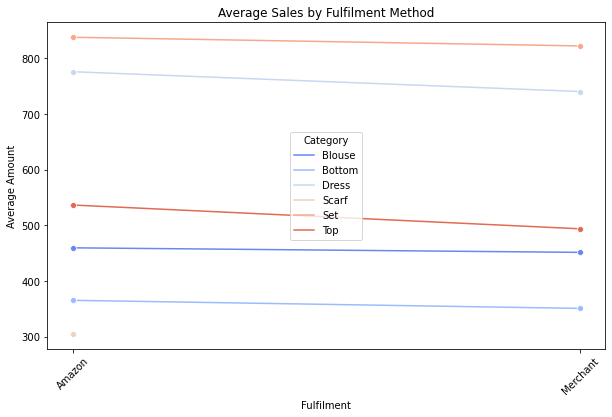

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Fulfilment', y='Amount', hue='Category', data=Fulfilment_avg, marker='o', palette='coolwarm')
plt.title('Average Sales by Fulfilment Method')
plt.ylabel('Average Amount')
plt.xlabel('Fulfilment')
plt.xticks(rotation=45)
plt.show()

### The average sales based on category and Status

In [30]:
Status_avg = sales_data_cleaned.groupby(['Category','Status'], as_index = False)['Amount'].mean()
print(Status_avg.sort_values('Amount', ascending = False))

   Category                         Status       Amount
23    Dress              Shipped - Damaged  1136.000000
38      Set     Shipped - Out for Delivery   908.105263
28    Dress    Shipped - Rejected by Buyer   899.000000
42      Set  Shipped - Returning to Seller   875.835616
39      Set            Shipped - Picked Up   846.322660
33      Set                        Pending   837.629482
35      Set                        Shipped   836.530584
36      Set   Shipped - Delivered to Buyer   827.042759
32      Set                      Cancelled   826.970953
41      Set   Shipped - Returned to Seller   824.475817
34      Set  Pending - Waiting for Pick Up   791.120370
30    Dress  Shipped - Returning to Seller   782.642857
22    Dress                        Shipped   774.604673
21    Dress  Pending - Waiting for Pick Up   767.531646
26    Dress     Shipped - Out for Delivery   765.000000
19    Dress                      Cancelled   752.765319
40      Set    Shipped - Rejected by Buyer   748

### The total sales based on fulfilment and shipment

In [31]:
Fulfilmet_shipped_total = sales_data_cleaned.groupby(['Fulfilment','Courier Status'], as_index = False)['Amount'].sum()
print(Fulfilmet_shipped_total.sort_values('Amount', ascending = False))

  Fulfilment Courier Status      Amount
0     Amazon        Shipped  50331934.0
2   Merchant        Shipped  20726730.0
1     Amazon      Unshipped   3990217.0
3   Merchant      Unshipped    353625.0


### Scatter plot for fulfilment vs courier status sales total

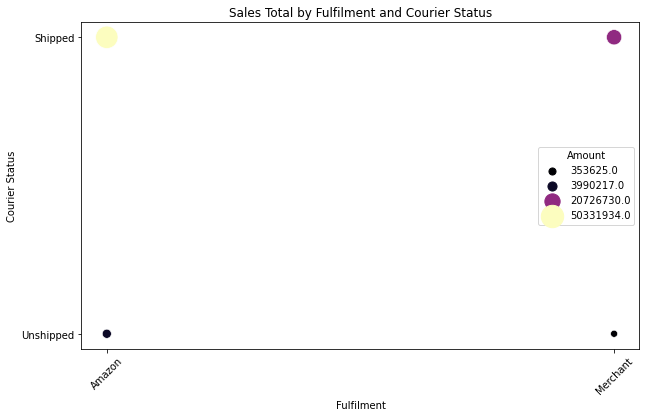

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fulfilment', y='Courier Status', size='Amount', data=Fulfilmet_shipped_total, hue='Amount', palette='magma', sizes=(50, 500))
plt.title('Sales Total by Fulfilment and Courier Status')
plt.xlabel('Fulfilment')
plt.ylabel('Courier Status')
plt.xticks(rotation=45)
plt.show()

In [33]:
with pd.ExcelWriter('sales_analysis_results.xlsx', engine='xlsxwriter') as writer:
    # Export each DataFrame to a separate sheet
    Sales_more_Than_1000.to_excel(writer, sheet_name='Sales > 1000', index=False)
    Sales_Tops_and_Qty_3.to_excel(writer, sheet_name='Tops Qty = 3', index=False)
    category_total.to_excel(writer, sheet_name='Category Totals', index=False)
    Fulfilment_avg.to_excel(writer, sheet_name='Fulfilment Avg', index=False)
    Status_avg.to_excel(writer, sheet_name='Status Avg', index=False)
    Fulfilmet_shipped_total.to_excel(writer, sheet_name='Fulfilment Shipped Total', index=False)

print("Analysis exported to 'sales_analysis_results.xlsx'")

Analysis exported to 'sales_analysis_results.xlsx'
